## 27. **Titanic 79665**

### 1. 사용 라이브러리

In [1]:
# 시각화 및 전처리
import csv
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 학습, 튜닝
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 사용모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# pip install lightgbm
# pip install xgboost

# 그 외
from IPython.display import Image 
import warnings 
warnings.filterwarnings('ignore')
# !pip install IPython 



### train data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

### test data

In [6]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.shape

(418, 11)

결측값 확인

In [10]:
# train
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# test
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 2. 결측치 처리

Age -> 평균 29.69

Age 분포 왜도 : 0.39


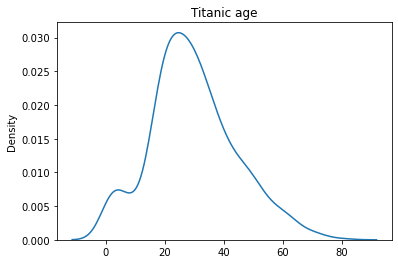

In [12]:
# Age 분포

sns.kdeplot(train['Age'].values)
plt.title('Titanic age')
print(f'Age 분포 왜도 : {(train["Age"].skew()).round(2)}')
plt.show()

In [13]:
train['Age'] = train['Age'].fillna(29.69) 
test['Age'] = test['Age'].fillna(29.69)

Embarked, Fare -> 최빈값

In [14]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Fare'] = test['Fare'].fillna(train['Fare'].mode())

### 3. 비대칭 분포(Fare)에 Log 

In [15]:
print(train['Fare'].skew())

4.787316519674893


No handles with labels found to put in legend.


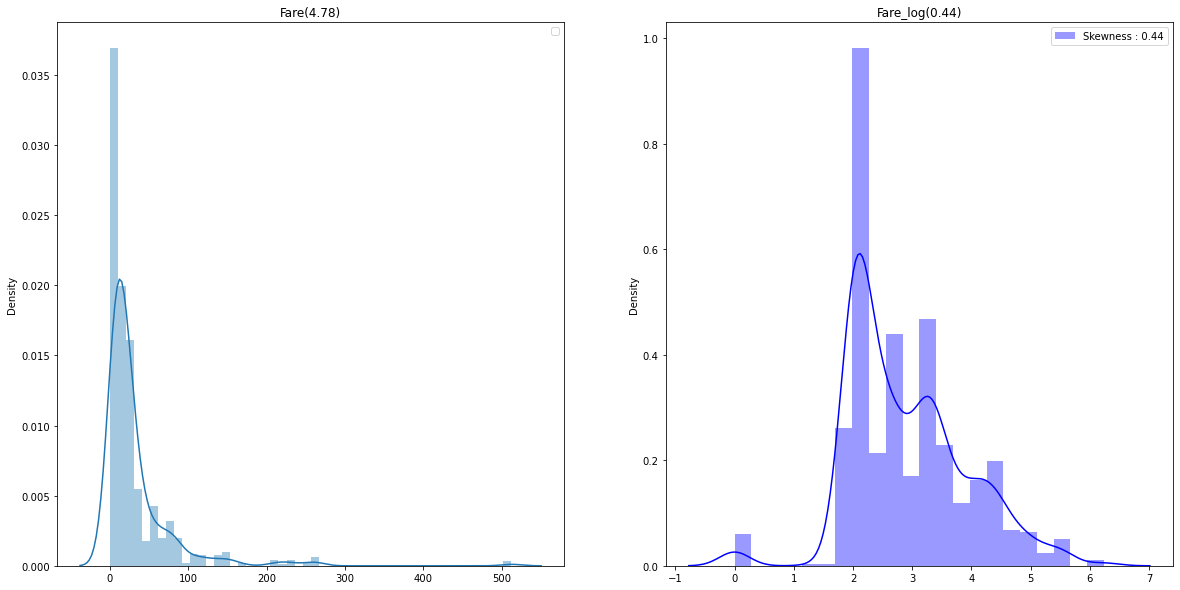

In [16]:
# log 전
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
sns.distplot(train['Fare'].values, ax=ax1)

# log 
train['Fare'] = train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

# log 후
sns.distplot(train['Fare'],color='b',label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax2)
ax1.set(xlabel='')
ax2.set(xlabel='')
ax1.set(title="Fare(4.78)")
ax2.set(title="Fare_log(0.44)")
ax1.legend(loc='best')
ax2.legend(loc='best')

### 4. 새 변수 생성

연령그룹 (Age > Age_gr)

In [17]:
def age_gr(x):
    if x < 5 :
       return 0
    if 5<=x<10:
       return 1
    if 10<=x<16:
       return 2
    if 16<=x<20:
       return 3    # 16세~ 성인 간주 
    if 20<=x<30:
       return 4
    if 30<=x<40:
       return 5
    if 40<=x<50:
       return 6
    if 50<=x<60:
       return 7
    if 60<=x<70:
       return 8
    if 70<=x<80:
       return 9
    if 80<=x<90:
       return 10


In [18]:
train['Age_gr'] = train['Age'].apply(lambda x:age_gr(x))
test['Age_gr'] = test['Age'].apply(lambda x:age_gr(x))

가족 수 (f_nm)

In [19]:
train['F_nm'] = train['SibSp'] + train['Parch']
test['F_nm'] = test['SibSp'] + test['Parch']

가족 유무(f_ox)

In [20]:
def f_ox(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1   

In [21]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

요금 범주 (Fare > Fare_gr)

In [22]:
train['Fare'] = pd.qcut(train['Fare'], 5)
test['Fare'] = pd.qcut(test['Fare'], 5)

train['Fare'].value_counts()

(2.061, 2.351]     184
(3.076, 3.681]     180
(-0.001, 2.061]    179
(3.681, 6.239]     176
(2.351, 3.076]     172
Name: Fare, dtype: int64

In [23]:
train['Fare'] = train['Fare'].astype('category').cat.codes
test['Fare'] = test['Fare'].astype('category').cat.codes

train['Fare'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare, dtype: int64

결혼 여부 (Name > Married)

In [24]:
# 미혼(0)
# Miss      미혼
# Master    미혼 남성(29살도 있음)
# Rev   신부님
# Mlle  미혼여성(마드모아젤) = Miss(프랑스 호)

# 기혼(1)
# Mr        기혼
# Mrs       기혼

# 불명(9)

In [25]:
train['Name'] = train['Name'].str.split(',').str[1]
train['Name'] = train['Name'].str.split('.').str[0]
train['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [26]:
test['Name'] = test['Name'].str.split(',').str[1]
test['Name'] = test['Name'].str.split('.').str[0]
test['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [27]:
my = [' Mr', ' Mrs']
mn = [' Miss', ' Master', ' Rev', ' Mlle']

train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)      

### 5. 인코딩
- 원 핫 : 데이터에 연속성이 없음을 인식
- 레이블 : 데이터에 연속성이 있음을 인식 

레이블 1. 범주가 순서를 가지는 변수

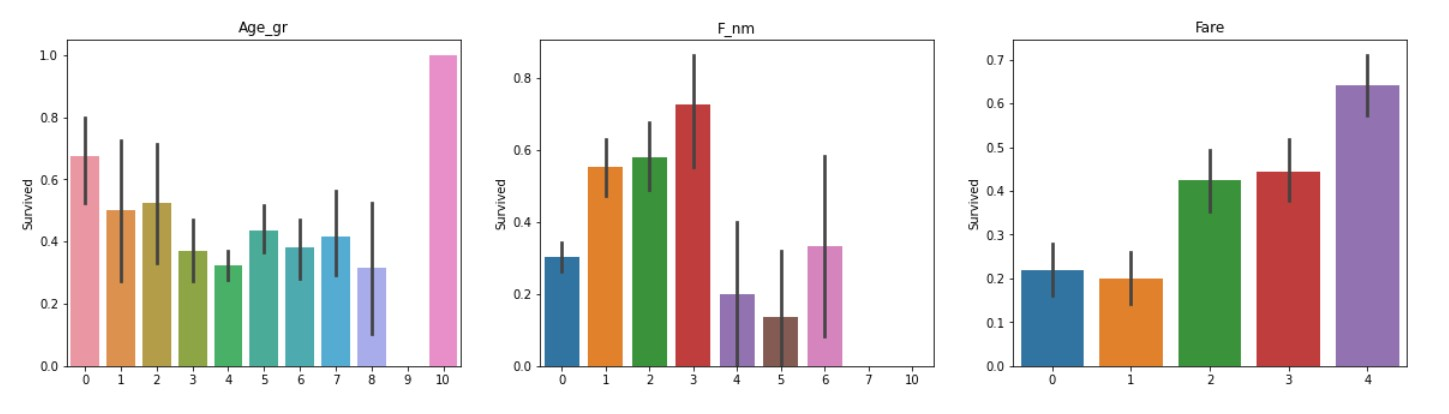

In [29]:
Image("인코딩1.jpg")

레이블 2. 타겟과의 관계에서 연속적인 증가 or 감소를 보이는 변수

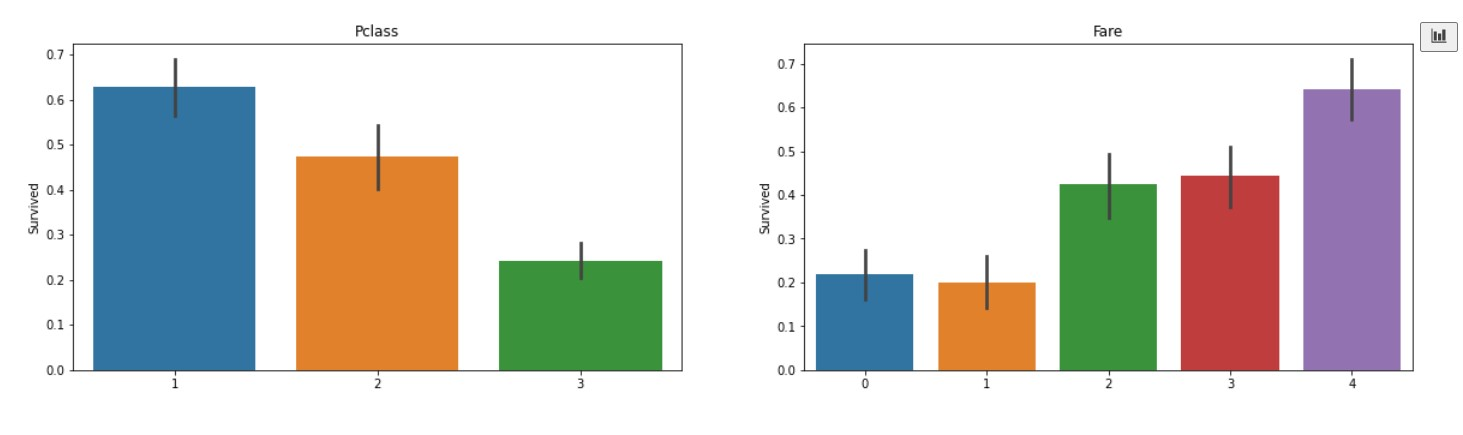

In [30]:
Image("인코딩2.jpg")

원핫.  연속성이 없고 3 범주 이하의 변수

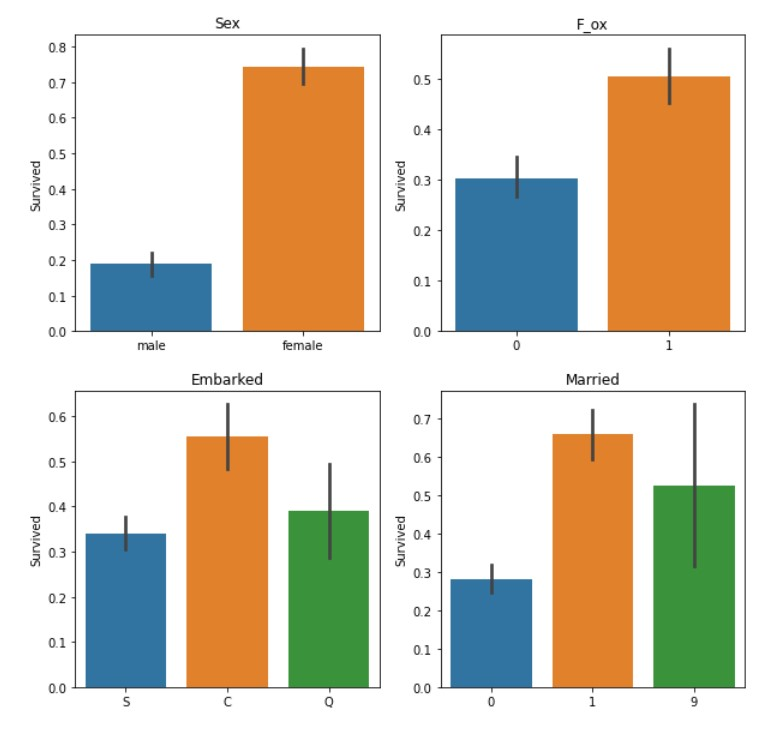

In [31]:
Image("인코딩3.jpg")

**그 외 경우의 수 中**

In [32]:
# sex, embarked, age_gr 레이블 인코딩 
 
train['Sex'] = LabelEncoder().fit_transform(train.Sex)
test['Sex'] = LabelEncoder().fit_transform(test.Sex)

train['Embarked'] = LabelEncoder().fit_transform(train.Embarked)
test['Embarked'] = LabelEncoder().fit_transform(test.Embarked)

train['Age_gr'] = LabelEncoder().fit_transform(train.Age_gr)
test['Age_gr'] = LabelEncoder().fit_transform(test.Age_gr)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,0,NaN,2,4,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,4,C85,0,5,1,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,1,NaN,2,4,0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,4,C123,2,5,1,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,1,NaN,2,5,0,0,0


### 6. 필요없는 변수 drop

In [33]:
# cabin, ticket, Name, Age, SibSp, Parch

train = train.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Name','Age'], axis=1)
test = test.drop(['Cabin', 'SibSp', 'Parch','Ticket','Name', 'Age'], axis=1)

In [34]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,0,3,1,0,2,4,1,1,0
1,1,1,0,4,0,5,1,1,0
2,1,3,0,1,2,4,0,0,1
3,1,1,0,4,2,5,1,1,0
4,0,3,1,1,2,5,0,0,0


In [35]:
test.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,892,3,1,1,1,5,0,0,0
1,893,3,0,0,2,6,1,1,0
2,894,2,1,1,1,8,0,0,0
3,895,3,1,1,2,4,0,0,0
4,896,3,0,2,2,4,2,1,0


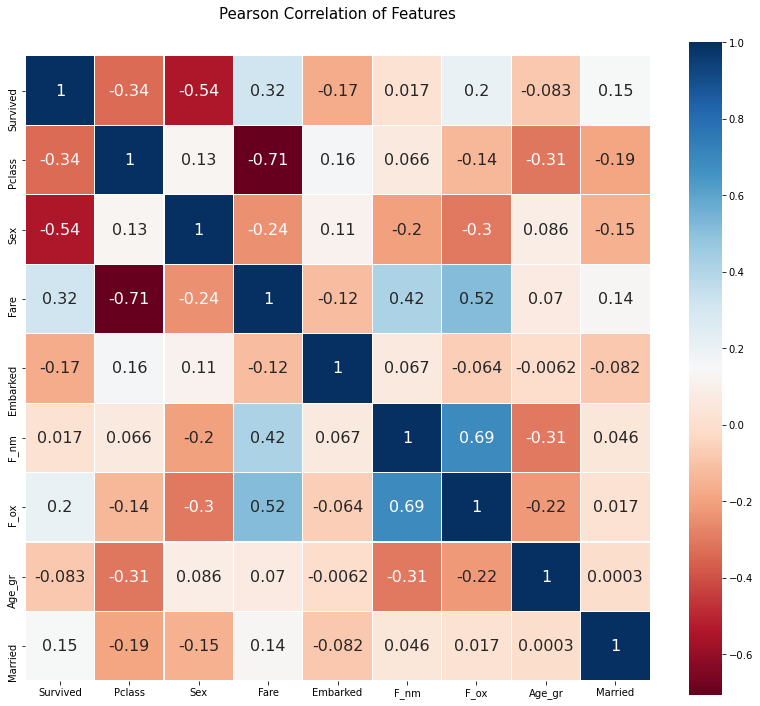

In [36]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'F_nm', 'F_ox', 'Age_gr', 'Married']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

### 7. 변수중요도

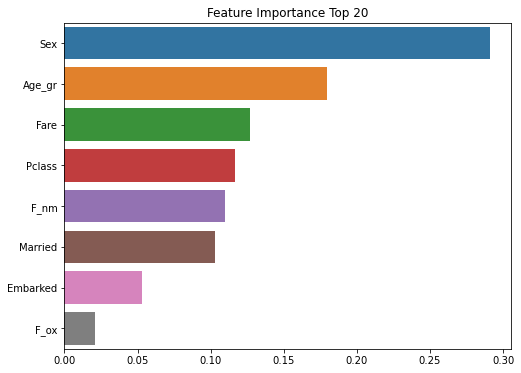

In [37]:
rfc = RandomForestClassifier(random_state=2022)# 77511

X = train.iloc[:,1:].values
y = train['Survived']
X_test = test.drop(['PassengerId'], axis=1)
X.shape, y.shape, X_test.shape

rfc.fit(X, y)

ft_importance_values = rfc.feature_importances_
ft_series = pd.Series(ft_importance_values, index = train.iloc[:,1:].columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]


plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

### 8. 분류 모델

- 예측을 위한 비선형 모델
- **DecisionTree, Random Forest, K최근접이웃 , XGBoost, LGBM**

In [39]:
dtree = DecisionTreeClassifier(random_state=2022)
rfc = RandomForestClassifier(random_state=2022)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=2022, eval_metric='mlogloss')
lgbm = LGBMClassifier(random_state=2022)

#### train, test(val) split

In [40]:
X = train.iloc[:,1:].values
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=2022)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 8), (223, 8), (668,), (223,))

#### GridSearchCV

In [41]:
params = {
    'n_estimators': [100],                 
    'max_depth': [3],          
    'num_leaves': [2],      
    'min_child_samples': [20],     
    'subsample' :  [0.5,1]                 
}

In [42]:
grid_lgbm = GridSearchCV(lgbm, param_grid=params, scoring='accuracy', cv=10)
grid_lgbm.fit(X_train, y_train)

print(grid_lgbm.best_params_)
print(grid_lgbm.best_score_)

{'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 2, 'subsample': 0.5}
0.8142469470827679


In [43]:
# 최적 튜닝 모델

dtree = DecisionTreeClassifier(random_state=2022, max_depth = 4, max_features = 5, max_leaf_nodes = 8, min_samples_leaf = 2, min_samples_split = 2)
rfc = RandomForestClassifier(random_state=2022, max_depth = 10, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 130)
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 87, weights = 'distance')
xgb = XGBClassifier(random_state=2022, eval_metric='mlogloss')
lgbm = LGBMClassifier(random_state=2022, max_depth = 4, min_child_samples = 40, n_estimators = 100, num_leaves = 20, subsample = 0.5)

#### Train set 전체 학습 / test 예측 

In [44]:
X = train.iloc[:,1:].values
y = train['Survived']
X_test = test.drop(['PassengerId'], axis=1)
X.shape, y.shape, X_test.shape

model = [dtree, rfc, knn, xgb, lgbm]
ac = []
pred = []

for i in model:
    i.fit(X, y)
    y_pred = i.predict(X_test)
    pred.append(y_pred)

dtree의 성능    : 82.04
rfc의 성능      : 89.11
knn의 성능      : 90.68
xgb의 성능      : 89.79
lgbm의 성능     : 85.86


In [45]:
# 예측

dtree = pred[0]
rfc = pred[1]
knn = pred[2]
xgb = pred[3]
lgbm = pred[4]

dtree = pd.DataFrame({'dtree': dtree})
rfc = pd.DataFrame({'rfc': rfc})
knn = pd.DataFrame({'knn': knn})
xgb = pd.DataFrame({'xgb': xgb})
lgbm = pd.DataFrame({'lgbm': lgbm})

model = [dtree, rfc, knn, xgb, lgbm]

for i in model:
    test = pd.concat([test, i], axis=1)

#### 앙상블 (예측값의 평균)

In [46]:
test['Survived'] = (test['dtree'] + test['rfc'] + test['knn'] + test['xgb'] + test['lgbm']) / 5

In [47]:
test = test.drop(['Pclass', 'Sex', 'Fare', 'Embarked', 'Age_gr', 'F_nm', 'F_ox', 'Married', 'dtree', 'rfc', 'knn', 'xgb', 'lgbm'], axis=1)
test['Survived'].value_counts()

0.0    230
1.0    112
0.2     24
0.6     20
0.8     18
0.4     14
Name: Survived, dtype: int64

In [48]:
def ensemble_survived(x):
    if x <= 0.2:
        return 0
    if x > 0.2:
        return 1 

test['Survived'] = test['Survived'].apply(lambda x: ensemble_survived(x))
test.to_csv('27_00.csv', index=False)

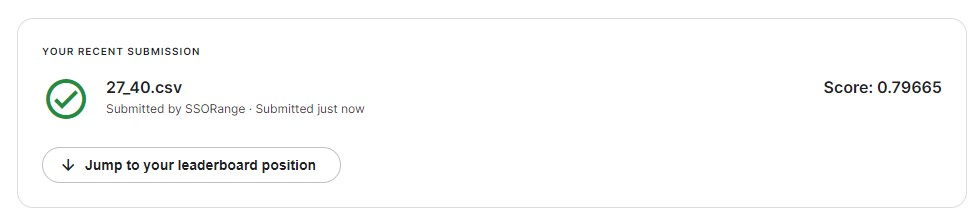

In [51]:
from IPython.display import Image 
Image("27_40.jpg")

### 9. 결론
-    유의미했던 변화
- 1. Fare log함수 + 범주화 
- 2. 예측 초점 비선형모델 선택
- 3. 단일 모델 -> 앙상블 사용 

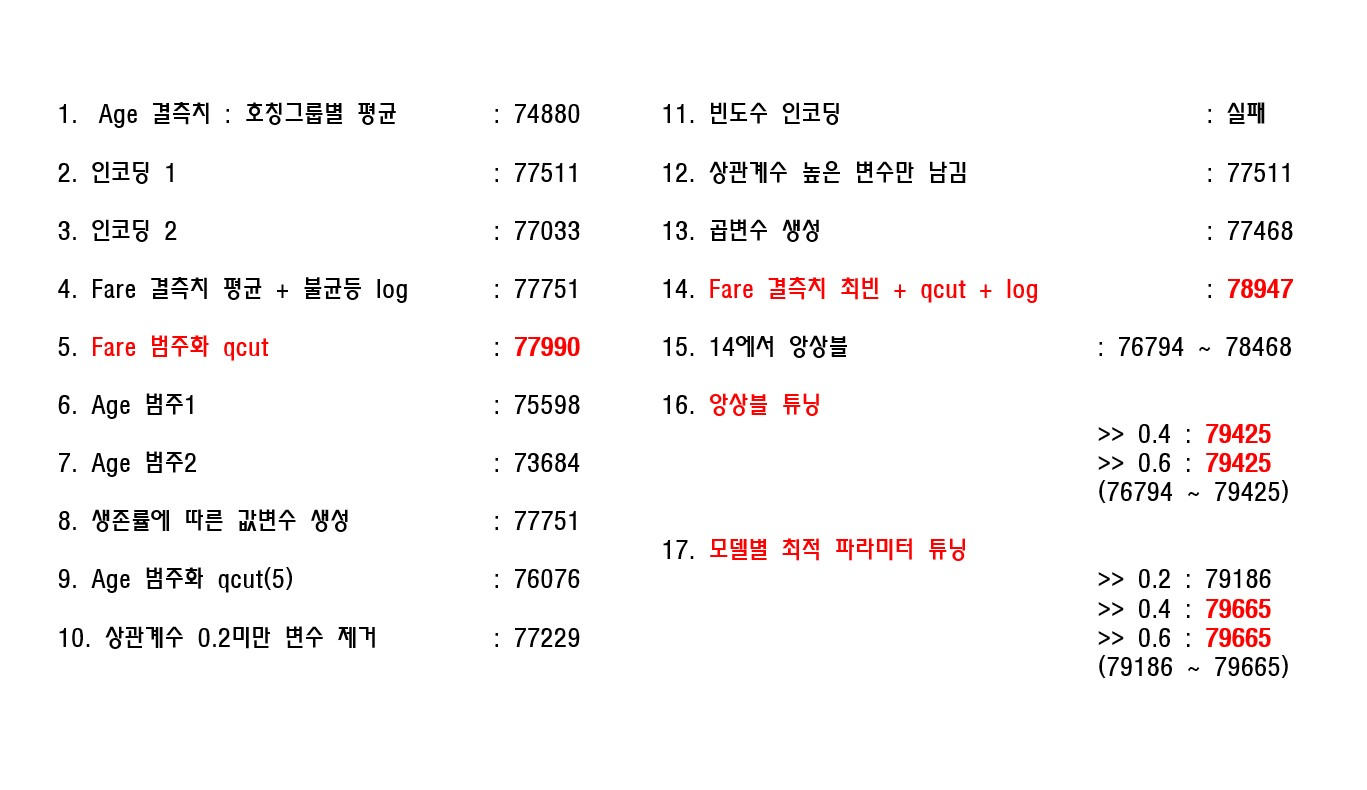

In [52]:
from IPython.display import Image 
Image("try.jpg")